In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

c:\Users\emreg\miniconda3\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\emreg\miniconda3\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'c:\\Users\\emreg\\Downloads\\hockey-env-master_my\\hockey-env-master\\hockey\\hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [7]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.10141876352421705,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [8]:
env.close()

# Train Shooting

In [9]:
#env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [10]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [11]:
env.close()

# Train DEFENDING

In [12]:
# env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [13]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
0.0
0.0
-0.4668920520767904
-0.37659699125089097
-0.2865244729342842
-0.197445432693498
-0.11244958769497822
-0.05661630785794173
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [14]:
env.close()

# Using discrete actions

In [15]:
import random

In [16]:
#env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [17]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [18]:
env.close()

# Hand-crafted Opponent

In [19]:
env = h_env.HockeyEnv()

In [20]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [21]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [22]:
np.mean(obs_buffer,axis=0)

array([-2.23665671, -0.24300946, -0.40027   , -0.44773744,  0.05313964,
       -0.5251429 ,  1.92169891, -0.2362089 ,  0.1149676 , -1.10446673,
       -0.63870846, -0.10722499,  0.11689434, -0.91314423,  7.95344209,
        1.06802863,  2.56097561,  0.        ])

In [23]:
np.std(obs_buffer,axis=0)

array([ 0.72847936,  0.18132742,  0.45150229,  5.96248739,  1.82765473,
        2.89687204,  0.98447643,  0.15286078,  0.0939592 ,  6.48362319,
        0.57535672,  0.7751797 ,  1.92519897,  0.80830789,  9.94574108,
       13.50358317,  4.72692743,  0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [24]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [25]:
import pylab as plt

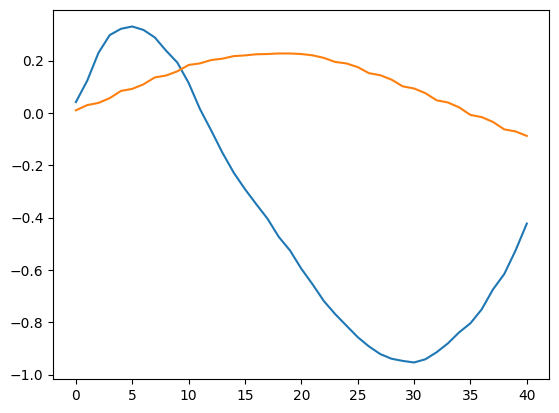

In [26]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

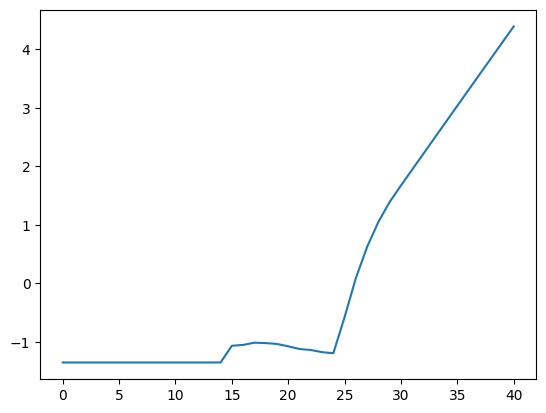

In [27]:
plt.plot(obs_buffer[:,12])

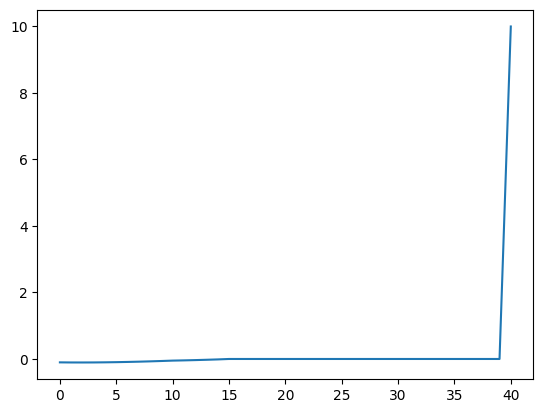

In [28]:
plt.plot(reward_buffer[:])

In [29]:
np.sum(reward_buffer)

np.float64(8.92261890754947)

In [30]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0021652622985839846},
 {'winner': -1,
  'reward_closeness_to_puck': -0.14407803631990335,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0021652622985839846},
 10.0,
 -10.144078036319904)

In [31]:
env.close()

# Human Opponent

In [32]:
env = h_env.HockeyEnv()

In [33]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [34]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [35]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [36]:
env.close()

# Check side consistency

In [37]:
env = h_env.HockeyEnv()

In [38]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [39]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [40]:
obs_buffer.shape

(154509, 18)

In [41]:
np.mean(obs_buffer,axis=0)

array([-2.96406633,  0.01532373,  0.00016081, -0.05148852, -0.00021251,
       -0.00039999,  2.96988717,  0.01518094,  0.0008953 ,  0.06021686,
        0.01420403, -0.01063335,  0.00445494,  0.02664419,  0.00675961,
       -0.00761353,  1.13012834,  1.08119915])

In [42]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([ 0.00035778,  0.02400166, -0.00026968,  0.00629031,  0.00978182,
       -0.00027145, -0.00035791, -0.0245919 ,  0.00026961, -0.00633013,
       -0.00987844,  0.00027138,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01953373, -0.01992289])

In [43]:
winner_buffer

[-1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 -1,
 0,
 0,
 -1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 1,
 0,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 0,
 1,
 0,
 -1,
 0,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 1,
 1,
 -1,

In [44]:
np.mean(winner_buffer,axis=0)

np.float64(0.0)

In [45]:
np.std(winner_buffer,axis=0)

np.float64(0.7962411694957753)

In [46]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(-4459.058983175828), np.float64(-4411.4911528307175))

In [47]:
env.close()

# My tests for TD3

In [48]:
#imports needed for TD3
from emre_version.TD3 import TD3
from emre_version.feedforward import Feedforward
from emre_version.memory import Memory
from emre_version.TD3_alternative import TD3 as TD3_Alternative

In [49]:
#instance of TD3
td3_agent = TD3(
    observation_space=env.observation_space,
    action_space=env.action_space,
    userconfig={
            # "eps": 0.1,            # Epsilon: noise strength to add to policy
            # "discount": 0.95,
            # "buffer_size": int(1e6),
            # "batch_size": 128,
            # "learning_rate_actor": 0.00001,
            # "learning_rate_critic": 0.0001,
            # "hidden_sizes_actor": [128,128],
            # "hidden_sizes_critic": [128,128,64],
            # "update_target_every": 100,
            # "use_target_net": True,
            # "policy_noise": 0.2,
		    # "noise_clip": 0.5,
            # "policy_freq": 2, 
            # "tau": 0.005
    }
)

In [50]:
#instance of TD3
td3_agent_alternative = TD3_Alternative(
    observation_space=env.observation_space,
    action_space=env.action_space,
    userconfig={
            # "eps": 0.1,            # Epsilon: noise strength to add to policy
            # "discount": 0.95,
            # "buffer_size": int(1e6),
            # "batch_size": 128,
            # "learning_rate_actor": 0.00001,
            # "learning_rate_critic": 0.0001,
            # "hidden_sizes_actor": [128,128],
            # "hidden_sizes_critic": [128,128,64],
            # "update_target_every": 100,
            # "use_target_net": True,
            # "policy_noise": 0.2,
		    # "noise_clip": 0.5,
            # "policy_freq": 2, 
            # "tau": 0.005
    }
)

# Not sure with anything after this point

# ChatGPT Version

Episode 1: Total Reward = -40.01855095605742
Episode 2: Total Reward = -4.4391413367909776
Episode 3: Total Reward = -48.97808745906926
Episode 4: Total Reward = 0.0
Episode 5: Total Reward = -0.49961214966324974
Episode 6: Total Reward = 8.260361453898355
Episode 7: Total Reward = -42.517745429477586
Episode 8: Total Reward = 0.0
Episode 9: Total Reward = -48.939692674187505
Episode 10: Total Reward = 0.0
Evaluation Episode 1: Reward = -30.822841283155125
Evaluation Episode 2: Reward = -10.854649394333853
Evaluation Episode 3: Reward = -51.45612186997408
Evaluation Episode 4: Reward = 0.0
Evaluation Episode 5: Reward = -55.85292410590328
Evaluation Episode 6: Reward = 0.0
Evaluation Episode 7: Reward = -41.90019936106469
Evaluation Episode 8: Reward = 0.0
Evaluation Episode 9: Reward = -52.32742141373379
Evaluation Episode 10: Reward = 0.0
Average Reward over 10 episodes: -24.32141574281648


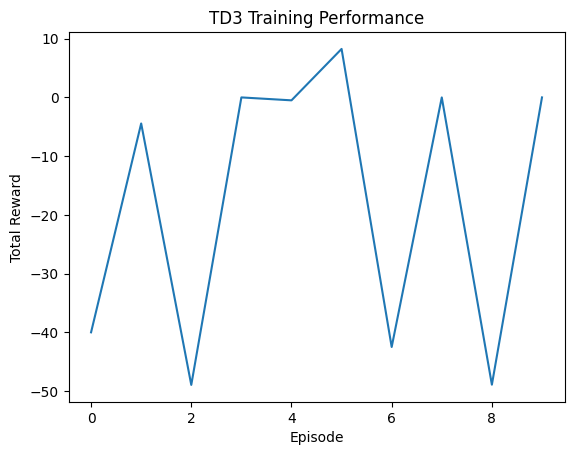

In [51]:
# Training loop for TD3
def train_td3(agent, env, episodes=10, max_steps=1000):
    rewards = []
    for episode in range(episodes):
        obs, _ = env.reset()
        episode_reward = 0
        for step in range(max_steps):
            action = agent.act(obs)  # TD3 decides action
            next_obs, reward, done, trunc, _ = env.step(action)
            agent.store_transition((obs, action, reward, next_obs, float(done)))
            agent.train()  # Train the TD3 agent
            episode_reward += reward
            obs = next_obs
            if done or trunc:
                break
        rewards.append(episode_reward)
        print(f"Episode {episode + 1}: Total Reward = {episode_reward}")
    return rewards

train_rewards = train_td3(td3_agent, env, episodes=10)

# Evaluation loop for TD3
def evaluate_td3(agent, env, episodes=10, max_steps=1000):
    total_rewards = []
    for episode in range(episodes):
        obs, _ = env.reset()
        episode_reward = 0
        for step in range(max_steps):
            action = agent.act(obs, eps=0.0)  # Disable exploration during evaluation
            next_obs, reward, done, trunc, _ = env.step(action)
            episode_reward += reward
            obs = next_obs
            if done or trunc:
                break
        total_rewards.append(episode_reward)
        print(f"Evaluation Episode {episode + 1}: Reward = {episode_reward}")
    avg_reward = np.mean(total_rewards)
    print(f"Average Reward over {episodes} episodes: {avg_reward}")
    return avg_reward

evaluate_td3(td3_agent, env, episodes=10)

plt.plot(train_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('TD3 Training Performance')
plt.show()

## Code I copied from above to try to train

In [52]:
env = h_env.HockeyEnv()

In [53]:
o, info = env.reset()
_ = env.render()
player1 = td3_agent
player2 = h_env.BasicOpponent()

In [54]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [55]:
np.mean(obs_buffer,axis=0)

array([-2.2108224 ,  2.39786588,  0.23252146,  0.32511347,  0.36416994,
       -0.13183097,  0.59711627,  2.67995372,  0.69163012, -0.50731795,
        0.57921817,  0.01516651, -1.37635088,  0.16674423,  0.        ,
        0.        ,  0.        ,  0.        ])

In [56]:
np.std(obs_buffer,axis=0)

array([1.02479795, 0.58864267, 0.69145398, 6.08103141, 3.27529055,
       5.41147151, 0.44588184, 0.56332883, 0.37951779, 1.69542212,
       2.02656514, 4.38255723, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [57]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [58]:
import pylab as plt

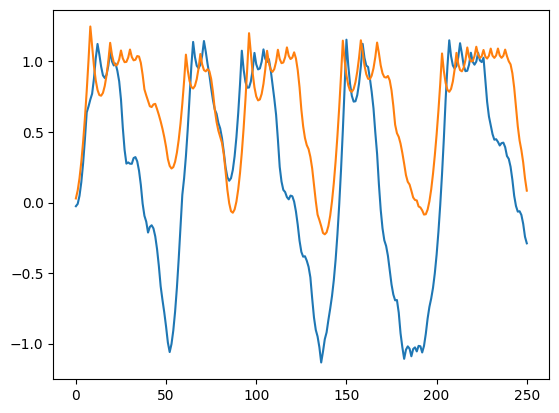

In [59]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

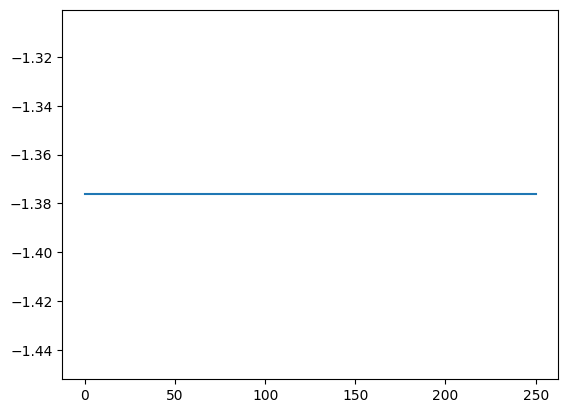

In [60]:
plt.plot(obs_buffer[:,12])

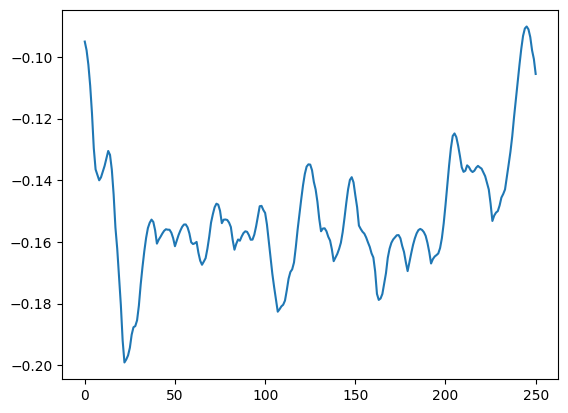

In [61]:
plt.plot(reward_buffer[:])

In [62]:
np.sum(reward_buffer)

np.float64(-38.11981008366936)

In [63]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': -0.10552433670634945,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0},
 -0.10552433670634945,
 0.0)

Episode 1: Total Reward = 0.0
Episode 2: Total Reward = -47.32454754805346
Episode 3: Total Reward = 0.0
Episode 4: Total Reward = -40.8023786866558
Episode 5: Total Reward = 0.0
Episode 6: Total Reward = -40.89115542484721
Episode 7: Total Reward = 0.0
Episode 8: Total Reward = -54.22866144515438
Episode 9: Total Reward = 0.0
Episode 10: Total Reward = -55.47921128698419
Evaluation Episode 1: Reward = 0.0
Evaluation Episode 2: Reward = -41.96801728524006
Evaluation Episode 3: Reward = 0.0
Evaluation Episode 4: Reward = -35.97584544347417
Evaluation Episode 5: Reward = 0.0
Evaluation Episode 6: Reward = -63.45758791316579
Evaluation Episode 7: Reward = 0.0
Evaluation Episode 8: Reward = -35.758848372215176
Evaluation Episode 9: Reward = 0.0
Evaluation Episode 10: Reward = -36.87842154317456
Average Reward over 10 episodes: -21.403872055726975


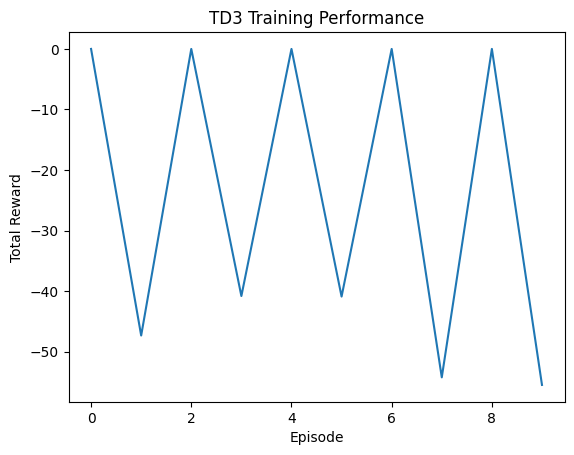

In [64]:
train_rewards_alternative = train_td3(td3_agent_alternative, env, episodes=10)



evaluate_td3(td3_agent_alternative, env, episodes=10)

plt.plot(train_rewards_alternative)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('TD3 Training Performance')
plt.show()

In [65]:
env.close()